In [45]:
# ensures modules and scripts are reloaded 
# to reflect recent changes:
%load_ext autoreload
%autoreload 2 
import logging
import seaborn as sns
import pandas as pd
import warnings
from pathlib import Path


# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

from utils import combine_results, add_compactness_category_col
SIM_DIR=r"C:\Users\Simon Schneider\Nextcloud\EE\1_Forschung\2_Laufend\2023 MA25 Alliiertenviertel\FHTW Ergebnisse\20241022 CEA run part"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
df = combine_results(SIM_DIR)


In [ ]:

bins = [0, 0.6, 0.8, 1, 1.8]
# Optionally, you can define labels for the bins (or leave this out for default bin labels)
labels = ['Very High', 'High', 'Medium', 'Low']
compact_col = "hull_ag_to_GFA_m2"
catname = "compact_category"
add_compactness_category_col(df, bins=bins, labels=labels, 
                           col = compact_col, 
                           name=catname)


In [ ]:
df.to_excel(Path(SIM_DIR)/'hulls_anual_specific_demands.xlsx')

In [34]:
df.pivot(columns='scenario', values='Qhs_kWhyr_Af_m2')

scenario,original_1919bis1944,san-min_1919bis1944
Name,,
B1000,135.741401,25.099996
B1001,159.897221,30.522576
B1002,190.778897,38.246413
B1003,174.179631,34.042892
B1004,159.241926,30.613487
...,...,...
B1072,190.795179,58.669120
B1073,0.000000,0.000000
B1074,140.540697,26.413167


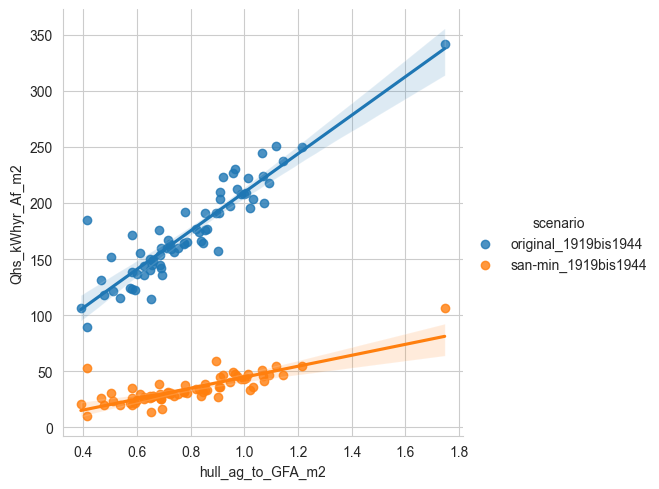

In [47]:
y_col = "Qhs_kWhyr_Af_m2"
x_col = compact_col
df_wo_zeros = df[df[y_col]>0]
sns.set_style("whitegrid")
sns.lmplot(df_wo_zeros, x=x_col , y=y_col, hue="scenario")

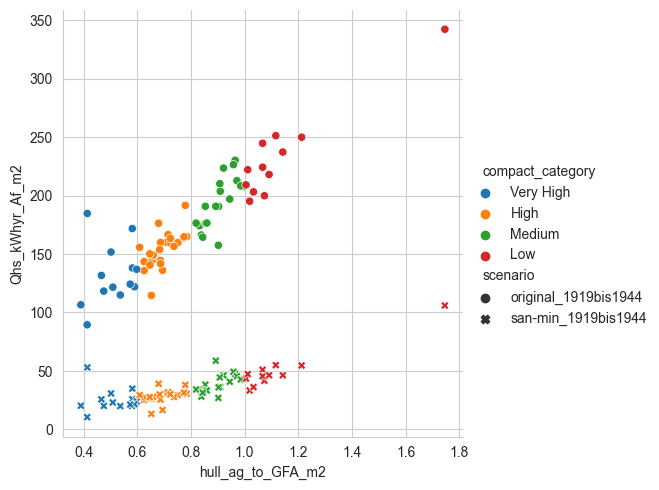

In [48]:

sns.relplot(df_wo_zeros, x=x_col, y=y_col, hue = compact_col, style="scenario")

<Axes: xlabel='hull_ag_to_GFA_m2', ylabel='Count'>

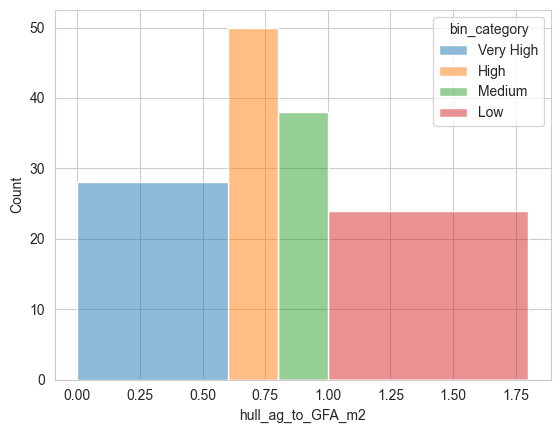

In [37]:
sns.histplot(df_wo_zeros, x=x_col, bins=bins, hue="bin_category")

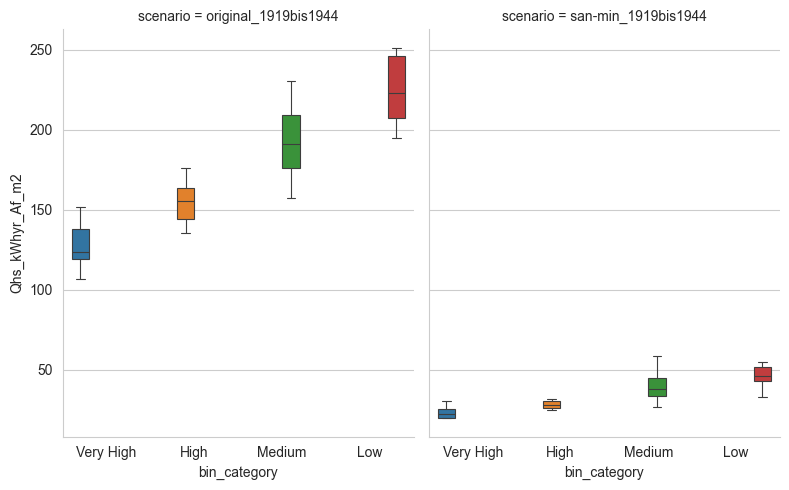

In [38]:
sns.catplot(
    data=df_wo_zeros,
    x='bin_category',  # X-axis will be the bins
    y=y_col,  # Y-axis is the dependent variable
    hue="bin_category",  # Differentiating by bin category
    col="scenario",  # Separate plots for each scenario
    kind="box",  # Use violin plot
    height=5,  # Height of each subplot
    aspect=0.8,  # Aspect ratio of the subplots
    linewidth=0.8,  # Reduce line width
    showfliers=False  # Hide outliers
)


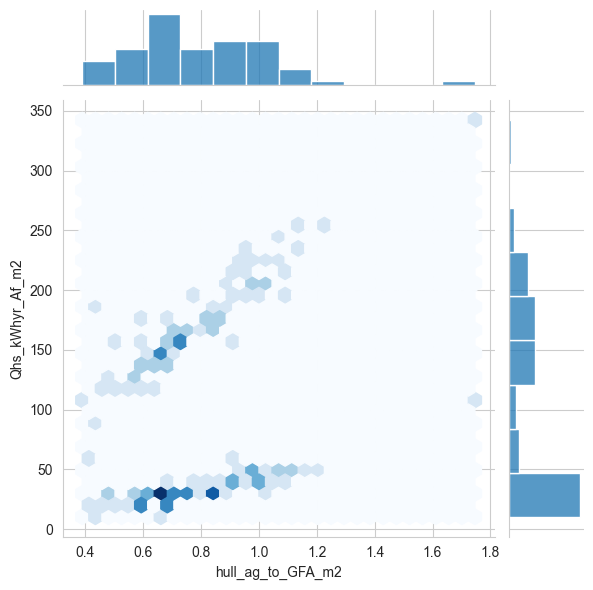

In [39]:
# Create hexbin plot with SeabornTrue, color
sns.jointplot(df_wo_zeros, x=x_col, y=y_col, kind="hex", gridsize=30, cmap="Blues")
